# Disciplina: Ciência de Dados (DCA-0131)
## Prof. Luiz Affonso Guedes

Departamento de Engenharia de Computação e Automação - DCA
UFRN - 2021

# COMPONENTES
Paula de Souza Braz,
Italo maciel e
Lays de Freitas

# **REQUISITOS PRINCIPAIS DO TRABALHO**
Trabalho 1 - EDA
Descrição:
Objetivo do Trabalho:

- Construir um Notebook Python com Análise Exploratória e Dados (EDA) sobre uma base de dados a escolha da equipe.

Objetivos Específicos: 

- Escolha da base de dados, justificando o motivo da escolha - relevância da informação associada a esses dados.

- Pré-processamento dos dados na base de dados - captura, limpeza, imputação de dados, até a produção do Dataframe adequado à análise.

- Análise exploratória dos dados utilizando técnicas estatísticas e de visualização de dados.

- Preparação do notebook Python com todas essas etapas.

 

Apresentação: 

- Produzir um vídeo de até 10 minutos contendo a explicação das diversas atividades desenvolvidas no notebook até a obtençãodos resultados da EDA.

- Publicar o vídeo no Youtube.

- Submeter o link do vídeo no Sigaa até a data de 08 de dezembro de 2021.

 

Na aula síncrona do dia 09 de dezembro de 2021 todos os vídeos submetidos no sistema serão apresentados e avaliados.




# **Instalando requerimentos**

In [1]:
# Biblioteca para trabalhar com mapas:
!pip install folium
!pip install seaborn

# **Importações**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px;
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
%pylab inline
plt.style.use('ggplot')

from scipy import stats
from pandas import Series,DataFrame

Populating the interactive namespace from numpy and matplotlib


# **Carregando os dados**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Carregando a base de dados:

dataset1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/finalizadas_2021-10.csv',sep=';',encoding='utf-8')
# Visualizando as 5 primeiras linhas do Dataframe:
dataset1.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor
0,NE,PI,Teresina,F,entre 21 a 30 anos,2021-10-01,NaN,BRB - Banco de Brasília,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Consignado / Cartão de Crédito Consign...,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Não comprei / contratei,N,N,Finalizada não avaliada,Não Avaliada,NaN
1,S,RS,São Borja,F,entre 61 a 70 anos,2021-10-01,NaN,Facta Financeira,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Consignado / Cartão de Crédito Consign...,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Telefone,S,N,Finalizada não avaliada,Não Avaliada,NaN
2,S,RS,Sapiranga,M,entre 61 a 70 anos,2021-10-01,NaN,Facta Financeira,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Consignado / Cartão de Crédito Consign...,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,S,N,Finalizada não avaliada,Não Avaliada,NaN
3,S,RS,Porto Alegre,M,entre 21 a 30 anos,2021-10-01,10.0,Vivo - Telefônica,"Operadoras de Telecomunicações (Telefonia, Int...",Produtos de Telefonia e Informática,Aparelho celular,Cobrança / Contestação,Cobrança indevida / abusiva para alterar ou ca...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN
4,NE,PE,Carpina,M,entre 21 a 30 anos,2021-10-01,10.0,Vivo - Telefônica,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN


# **Começando a tratar os dados**

In [5]:
#Excluindo colunas não relevantes
dataset1.pop("Sexo")
dataset1.pop("Faixa Etária")

0         entre 21 a 30 anos
1         entre 61 a 70 anos
2         entre 61 a 70 anos
3         entre 21 a 30 anos
4         entre 21 a 30 anos
                 ...        
120703    entre 31 a 40 anos
120704    entre 41 a 50 anos
120705    entre 51 a 60 anos
120706    entre 21 a 30 anos
120707    entre 31 a 40 anos
Name: Faixa Etária, Length: 120708, dtype: object

In [6]:
#vizualizando a tabela
dataset1.head()

,Região,UF,Cidade,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor
0,NE,PI,Teresina,2021-10-01,NaN,BRB - Banco de Brasília,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Consignado / Cartão de Crédito Consign...,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Não comprei / contratei,N,N,Finalizada não avaliada,Não Avaliada,NaN
1,S,RS,São Borja,2021-10-01,NaN,Facta Financeira,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Consignado / Cartão de Crédito Consign...,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Telefone,S,N,Finalizada não avaliada,Não Avaliada,NaN
2,S,RS,Sapiranga,2021-10-01,NaN,Facta Financeira,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Consignado / Cartão de Crédito Consign...,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,S,N,Finalizada não avaliada,Não Avaliada,NaN
3,S,RS,Porto Alegre,2021-10-01,10.0,Vivo - Telefônica,"Operadoras de Telecomunicações (Telefonia, Int...",Produtos de Telefonia e Informática,Aparelho celular,Cobrança / Contestação,Cobrança indevida / abusiva para alterar ou ca...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN
4,NE,PE,Carpina,2021-10-01,10.0,Vivo - Telefônica,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN


In [7]:
dataset = dataset1['Segmento de Mercado'].value_counts().head()
dataset_array = dataset.array

dataset_array

<PandasArray>
[36483, 25027, 11407, 7927, 5156]
Length: 5, dtype: int64

In [8]:
dataSet = dataset1['Segmento de Mercado'].unique()

dataSet

array(['Bancos, Financeiras e Administradoras de Cartão',
       'Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)',
       'Seguros, Capitalização e Previdência', 'Energia Elétrica',
       'Comércio Eletrônico', 'Empresas de Pagamento Eletrônico',
       'Empresas de Intermediação de Serviços / Negócios',
       'Programas de Fidelidade', 'Agua e Saneamento',
       'Perfumaria, Cosméticos e Higiene Pessoal', 'Varejo',
       'Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática',
       'Montadoras, Concessionárias e Prestadores de Serviços Automotivos',
       'Viagens, Turismo e Hospedagem', 'Transporte Aéreo',
       'Provedores de Conteúdo e Outros Serviços na Internet',
       'Administradoras de Consórcios',
       'Operadoras de Planos de Saúde e Administradoras de Benefícios',
       'Distribuidoras de Combustíveis / Gás',
       'Fabricantes - Eletroportáteis e Artigos de Uso Doméstico e Pessoal',
       'Supermercados', 'Empresas de 

In [9]:
# Quantidade de reclamações por "UF" existentes

ReclamacoesDF = dataset1['UF'].value_counts()
ReclamacoesDF

SP    28006
MG    13383
RJ    11646
PR     9776
RS     8514
BA     6746
DF     5981
SC     5151
GO     3980
CE     3266
PE     3172
ES     2891
MA     2798
MT     2148
PI     1857
PA     1638
PB     1507
AM     1470
TO     1428
MS     1416
RN     1059
AL     1037
SE      656
RO      469
AC      302
RR      208
AP      203
Name: UF, dtype: int64

In [10]:
# Criando um DataFrame com apenas as colunas 'UF' e 'Respondida'
DF1 = dataset1[['Região','UF','Cidade','Respondida','Avaliação Reclamação']]

indexNames = DF1[ (DF1['Respondida'] == 'N') ].index
DF1.drop(indexNames , inplace=True)

#Teste para verificar se as linhas com Respondida igual a N foram apagadas
#DF1['Respondida'].value_counts()

# Criando um array com os valores de cada Avaliação Reclamanão em cada Cidade de cada UF
#DF1_array = DF1.value_counts()

#DF2 = pd.DataFrame(DF1_array)

In [11]:
DF1.value_counts()

Região  UF  Cidade          Respondida  Avaliação Reclamação
SE      SP  São Paulo       S           Não Avaliada            5072
                                        Resolvida               3163
        RJ  Rio de Janeiro  S           Não Avaliada            2970
CO      DF  Brasília        S           Não Avaliada            2691
SE      SP  São Paulo       S           Não Resolvida           2637
                                                                ... 
        ES  Mimoso do Sul   S           Não Resolvida              1
            Mucurici        S           Não Avaliada               1
NE      MA  Codozinho       S           Não Avaliada               1
SE      ES  Muniz Freire    S           Não Resolvida              1
S       PR  Pato Branco     S           Não Resolvida              1
Length: 7510, dtype: int64

In [12]:
indexNames = DF1[ (DF1['UF'] != 'N') ].index
DF1_1 =  DF1.drop(indexNames)

In [13]:
#scatter plot

#fig=px.scatter(DF2, x = "Tempo Resposta", y = "Respondida", size = "0", color = "UF",
#               hover_name = "Cidade", log_x = True, size_max = 60, width = 800)
#fig.update_layout(title = 'Logaritmo do PIB per capita X Expectativa de vida no ano de 2019')
#fig.update_xaxes(title = 'Log (PIB per capita)')
#fig.update_yaxes(title = 'Expectativa de vida')
#fig.show()

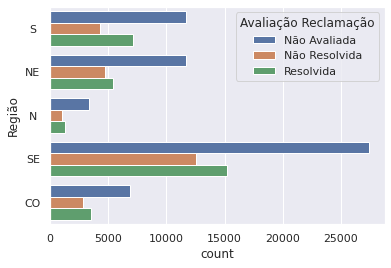

In [14]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Região", hue="Avaliação Reclamação", data=DF1)

In [15]:
#Estes consumidores procuram a empresa antes de registrar uma reclamação?
DF3 = dataset1['Procurou Empresa'].value_counts()
DF3

S    101536
N     19172
Name: Procurou Empresa, dtype: int64

In [16]:
QtdSN = 101536 + 19172
QtdSN

120708

In [17]:
# Quantidade de reclamações por "nome fantasia" existentes 

NomeFantasiaDF = dataset1['Nome Fantasia'].value_counts()
NomeFantasiaDF.head()

Vivo - Telefônica          8703
Gol Linhas Aéreas          5043
Caixa Econômica Federal    3722
Claro Celular              3621
Tim                        3443
Name: Nome Fantasia, dtype: int64